# Train and test the model

In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
from tqdm import tqdm

# functions from other notebooks
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import classifier
# from ipynb.fs.full.generate_data import convert, visualize

Using TensorFlow backend.


# Data

In [2]:
# load data
f_path = 'c_data_1B.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [3]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

# save test set
f_path = 'c_testdata_1A.h5'
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
X_test_df.to_hdf(f_path, key='X', mode='w')
y_test_df.to_hdf(f_path, key='y')

C:\Users\Ruining\.conda\envs\machine_learning\lib\site-packages\pandas\core\generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_values] [items->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167

In [4]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

# one hot code y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model

In [5]:
# Check model performance accuracy before
model = load_model("classify1A.h5")

# Pre_train score record
pre_score = model.evaluate(X_test, y_test, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1473/1473 [==============================] - ETA: 1: - ETA: 30s - ETA: 14 - ETA: 10 - ETA: 7 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 2ms/step


In [6]:
# fit network

epoch = 150
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='val_acc',verbose=1,min_delta=0.5,patience=6,baseline=None)

history = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Train on 10599 samples, validate on 2650 samples
Epoch 1/150
 7020/10599 [==================>...........] - ETA: 8:38 - loss: 1.1921e-07 - acc: 1.000 - ETA: 1:30 - loss: 1.4560 - acc: 0.8571    - ETA: 1:01 - loss: 1.0711 - acc: 0.883 - ETA: 43s - loss: 1.4041 - acc: 0.880 - ETA: 37s - loss: 1.6100 - acc: 0.85 - ETA: 33s - loss: 1.6037 - acc: 0.85 - ETA: 30s - loss: 1.3708 - acc: 0.87 - ETA: 28s - loss: 1.2117 - acc: 0.87 - ETA: 27s - loss: 1.0773 - acc: 0.88 - ETA: 25s - loss: 0.9341 - acc: 0.90 - ETA: 24s - loss: 0.9050 - acc: 0.90 - ETA: 24s - loss: 0.8741 - acc: 0.90 - ETA: 23s - loss: 0.7876 - acc: 0.91 - ETA: 22s - loss: 0.7160 - acc: 0.92 - ETA: 22s - loss: 0.6713 - acc: 0.92 - ETA: 21s - loss: 0.6251 - acc: 0.93 - ETA: 21s - loss: 0.5900 - acc: 0.93 - ETA: 21s - loss: 0.5587 - acc: 0.93 - ETA: 20s - loss: 0.5224 - acc: 0.94 - ETA: 20s - loss: 0.4977 - acc: 0.94 - ETA: 20s - loss: 0.4718 - acc: 0.94 - ETA: 20s - loss: 0.4516 - acc: 0.95 - ETA: 19s - loss: 0.4332 - acc: 0.95 - ETA

 6025/10599 [================>.............] - ETA: 29s - loss: 1.4305e-07 - acc: 1.00 - ETA: 17s - loss: 9.0713e-05 - acc: 1.00 - ETA: 17s - loss: 1.5446e-04 - acc: 1.00 - ETA: 17s - loss: 2.2675e-04 - acc: 1.00 - ETA: 17s - loss: 8.1166e-04 - acc: 1.00 - ETA: 17s - loss: 6.7279e-04 - acc: 1.00 - ETA: 17s - loss: 5.7715e-04 - acc: 1.00 - ETA: 17s - loss: 5.6462e-04 - acc: 1.00 - ETA: 17s - loss: 8.5784e-04 - acc: 1.00 - ETA: 16s - loss: 8.7726e-04 - acc: 1.00 - ETA: 16s - loss: 0.0013 - acc: 1.0000   - ETA: 16s - loss: 0.0013 - acc: 1.00 - ETA: 16s - loss: 0.0012 - acc: 1.00 - ETA: 16s - loss: 0.0011 - acc: 1.00 - ETA: 16s - loss: 0.0011 - acc: 1.00 - ETA: 16s - loss: 0.0013 - acc: 1.00 - ETA: 16s - loss: 0.0012 - acc: 1.00 - ETA: 16s - loss: 0.0011 - acc: 1.00 - ETA: 16s - loss: 0.0011 - acc: 1.00 - ETA: 16s - loss: 0.0011 - acc: 1.00 - ETA: 16s - loss: 0.0011 - acc: 1.00 - ETA: 16s - loss: 0.0011 - acc: 1.00 - ETA: 16s - loss: 0.0011 - acc: 1.00 - ETA: 16s - loss: 0.0010 - acc: 1.00

10599/10599 [==============================] - ETA: 7s - loss: 3.8147e-04 - acc: 1.000 - ETA: 7s - loss: 3.8077e-04 - acc: 1.000 - ETA: 7s - loss: 3.7900e-04 - acc: 1.000 - ETA: 7s - loss: 3.7730e-04 - acc: 1.000 - ETA: 7s - loss: 3.7583e-04 - acc: 1.000 - ETA: 7s - loss: 3.7404e-04 - acc: 1.000 - ETA: 7s - loss: 3.7225e-04 - acc: 1.000 - ETA: 7s - loss: 3.7050e-04 - acc: 1.000 - ETA: 7s - loss: 3.6889e-04 - acc: 1.000 - ETA: 7s - loss: 3.6758e-04 - acc: 1.000 - ETA: 7s - loss: 3.6591e-04 - acc: 1.000 - ETA: 7s - loss: 3.6424e-04 - acc: 1.000 - ETA: 7s - loss: 3.6442e-04 - acc: 1.000 - ETA: 7s - loss: 3.6289e-04 - acc: 1.000 - ETA: 7s - loss: 3.6301e-04 - acc: 1.000 - ETA: 7s - loss: 3.6214e-04 - acc: 1.000 - ETA: 7s - loss: 3.6056e-04 - acc: 1.000 - ETA: 7s - loss: 3.5943e-04 - acc: 1.000 - ETA: 7s - loss: 3.5791e-04 - acc: 1.000 - ETA: 6s - loss: 3.5644e-04 - acc: 1.000 - ETA: 6s - loss: 3.5486e-04 - acc: 1.000 - ETA: 6s - loss: 3.5378e-04 - acc: 1.000 - ETA: 6s - loss: 3.5228e-04 - 

 5795/10599 [===============>..............] - ETA: 25s - loss: 1.1921e-07 - acc: 1.00 - ETA: 19s - loss: 5.0616e-06 - acc: 1.00 - ETA: 18s - loss: 3.0584e-06 - acc: 1.00 - ETA: 18s - loss: 4.8880e-06 - acc: 1.00 - ETA: 18s - loss: 3.8031e-06 - acc: 1.00 - ETA: 18s - loss: 3.0912e-06 - acc: 1.00 - ETA: 18s - loss: 3.3523e-06 - acc: 1.00 - ETA: 18s - loss: 3.4664e-06 - acc: 1.00 - ETA: 18s - loss: 5.1601e-06 - acc: 1.00 - ETA: 18s - loss: 1.6657e-05 - acc: 1.00 - ETA: 18s - loss: 1.5243e-05 - acc: 1.00 - ETA: 18s - loss: 1.4902e-05 - acc: 1.00 - ETA: 18s - loss: 1.3699e-05 - acc: 1.00 - ETA: 18s - loss: 1.2777e-05 - acc: 1.00 - ETA: 18s - loss: 1.2591e-05 - acc: 1.00 - ETA: 17s - loss: 1.4501e-05 - acc: 1.00 - ETA: 17s - loss: 1.3853e-05 - acc: 1.00 - ETA: 17s - loss: 1.5091e-05 - acc: 1.00 - ETA: 17s - loss: 1.4302e-05 - acc: 1.00 - ETA: 17s - loss: 1.3672e-05 - acc: 1.00 - ETA: 17s - loss: 1.4220e-05 - acc: 1.00 - ETA: 17s - loss: 1.4014e-05 - acc: 1.00 - ETA: 17s - loss: 1.4082e-05 -

10599/10599 [==============================] - ETA: 8s - loss: 1.1079e-05 - acc: 1.000 - ETA: 8s - loss: 1.1026e-05 - acc: 1.000 - ETA: 8s - loss: 1.1029e-05 - acc: 1.000 - ETA: 8s - loss: 1.0977e-05 - acc: 1.000 - ETA: 8s - loss: 1.0975e-05 - acc: 1.000 - ETA: 8s - loss: 1.0950e-05 - acc: 1.000 - ETA: 8s - loss: 1.0903e-05 - acc: 1.000 - ETA: 8s - loss: 1.0853e-05 - acc: 1.000 - ETA: 7s - loss: 1.0808e-05 - acc: 1.000 - ETA: 7s - loss: 1.0788e-05 - acc: 1.000 - ETA: 7s - loss: 1.0740e-05 - acc: 1.000 - ETA: 7s - loss: 1.0697e-05 - acc: 1.000 - ETA: 7s - loss: 1.0653e-05 - acc: 1.000 - ETA: 7s - loss: 1.0612e-05 - acc: 1.000 - ETA: 7s - loss: 1.0585e-05 - acc: 1.000 - ETA: 7s - loss: 1.0547e-05 - acc: 1.000 - ETA: 7s - loss: 1.0540e-05 - acc: 1.000 - ETA: 7s - loss: 1.0515e-05 - acc: 1.000 - ETA: 7s - loss: 1.0480e-05 - acc: 1.000 - ETA: 7s - loss: 1.0454e-05 - acc: 1.000 - ETA: 7s - loss: 1.0406e-05 - acc: 1.000 - ETA: 7s - loss: 1.0422e-05 - acc: 1.000 - ETA: 7s - loss: 1.0398e-05 - 

 5795/10599 [===============>..............] - ETA: 16s - loss: 1.1921e-07 - acc: 1.00 - ETA: 18s - loss: 1.6025e-06 - acc: 1.00 - ETA: 18s - loss: 1.0316e-06 - acc: 1.00 - ETA: 18s - loss: 1.8296e-06 - acc: 1.00 - ETA: 18s - loss: 1.5521e-06 - acc: 1.00 - ETA: 18s - loss: 1.2917e-06 - acc: 1.00 - ETA: 18s - loss: 1.1074e-06 - acc: 1.00 - ETA: 18s - loss: 1.0976e-06 - acc: 1.00 - ETA: 18s - loss: 1.1804e-06 - acc: 1.00 - ETA: 18s - loss: 1.3625e-06 - acc: 1.00 - ETA: 18s - loss: 1.6238e-06 - acc: 1.00 - ETA: 17s - loss: 1.4891e-06 - acc: 1.00 - ETA: 17s - loss: 1.6794e-06 - acc: 1.00 - ETA: 17s - loss: 1.6006e-06 - acc: 1.00 - ETA: 17s - loss: 1.5918e-06 - acc: 1.00 - ETA: 17s - loss: 1.5364e-06 - acc: 1.00 - ETA: 17s - loss: 1.4552e-06 - acc: 1.00 - ETA: 17s - loss: 1.4162e-06 - acc: 1.00 - ETA: 17s - loss: 1.3448e-06 - acc: 1.00 - ETA: 17s - loss: 1.4544e-06 - acc: 1.00 - ETA: 17s - loss: 1.5574e-06 - acc: 1.00 - ETA: 17s - loss: 1.5591e-06 - acc: 1.00 - ETA: 17s - loss: 1.5683e-06 -

10599/10599 [==============================] - ETA: 8s - loss: 1.1555e-06 - acc: 1.000 - ETA: 8s - loss: 1.1518e-06 - acc: 1.000 - ETA: 8s - loss: 1.1568e-06 - acc: 1.000 - ETA: 8s - loss: 1.1522e-06 - acc: 1.000 - ETA: 8s - loss: 1.1497e-06 - acc: 1.000 - ETA: 8s - loss: 1.1457e-06 - acc: 1.000 - ETA: 8s - loss: 1.1412e-06 - acc: 1.000 - ETA: 8s - loss: 1.1364e-06 - acc: 1.000 - ETA: 8s - loss: 1.1321e-06 - acc: 1.000 - ETA: 7s - loss: 1.1271e-06 - acc: 1.000 - ETA: 7s - loss: 1.1234e-06 - acc: 1.000 - ETA: 7s - loss: 1.1200e-06 - acc: 1.000 - ETA: 7s - loss: 1.1153e-06 - acc: 1.000 - ETA: 7s - loss: 1.1105e-06 - acc: 1.000 - ETA: 7s - loss: 1.1183e-06 - acc: 1.000 - ETA: 7s - loss: 1.1135e-06 - acc: 1.000 - ETA: 7s - loss: 1.1122e-06 - acc: 1.000 - ETA: 7s - loss: 1.1099e-06 - acc: 1.000 - ETA: 7s - loss: 1.1059e-06 - acc: 1.000 - ETA: 7s - loss: 1.1016e-06 - acc: 1.000 - ETA: 7s - loss: 1.0970e-06 - acc: 1.000 - ETA: 7s - loss: 1.0926e-06 - acc: 1.000 - ETA: 7s - loss: 1.0903e-06 - 

# Performance

In [7]:
# Scores

print("Before training:")
print('Test loss:', pre_score[0])
print('Test accuracy:', pre_score[1])
print()

score = model.evaluate(X_test, y_test, verbose=1)
print("After training:")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Before training:
Test loss: 0.3902871644431857
Test accuracy: 0.9422946367956552

1473/1473 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 671us/step
After training:
Test loss: 2.491430331475093e-07
Test accuracy: 1.0


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


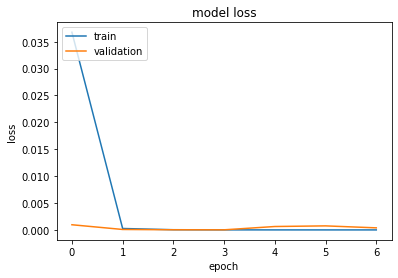

In [8]:
# Training history Statistics

print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Save

In [9]:
# Save model
model.save('classify1B.h5') 

import h5py
# save history
h = h5py.File('../history/c_his_1B.h5')
d = history.history
for k, v in d.items():
    h.create_dataset(k, data=np.array(v, dtype=np.float32))

# Analysis

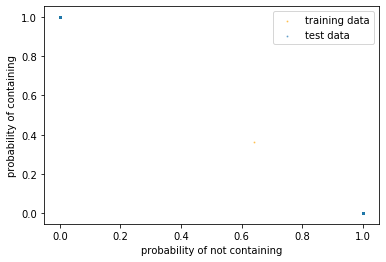

In [10]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

result_train = model.predict(X_train)
neg2 = result_train[0:,0] #first column
pos2 = result_train[0:,1] #second column

plt.scatter(neg2, pos2, s=1, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()